## Classificador linear

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Base de dados :

In [3]:
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv',header = None)
print(data)



                0            1             2            3          4
0    sepal.length  sepal.width  petal.length  petal.width    variety
1             5.1          3.5           1.4           .2     Setosa
2             4.9            3           1.4           .2     Setosa
3             4.7          3.2           1.3           .2     Setosa
4             4.6          3.1           1.5           .2     Setosa
..            ...          ...           ...          ...        ...
146           6.7            3           5.2          2.3  Virginica
147           6.3          2.5             5          1.9  Virginica
148           6.5            3           5.2            2  Virginica
149           6.2          3.4           5.4          2.3  Virginica
150           5.9            3           5.1          1.8  Virginica

[151 rows x 5 columns]


## Transformação das classes :

In [4]:
data = data[1:101]
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1)
print(data)

       0    1    2    3  4
1    5.1  3.5  1.4   .2  1
2    4.9    3  1.4   .2  1
3    4.7  3.2  1.3   .2  1
4    4.6  3.1  1.5   .2  1
5      5  3.6  1.4   .2  1
..   ...  ...  ...  ... ..
96   5.7    3  4.2  1.2  1
97   5.7  2.9  4.2  1.3  1
98   6.2  2.9  4.3  1.3  1
99   5.1  2.5    3  1.1  1
100  5.7  2.8  4.1  1.3  1

[100 rows x 5 columns]


## Preparação da base de dados para utilização no classificador :

In [5]:
xo = np.ones(100)

features = np.asmatrix([xo, data[0] , data[2]])

features = features.transpose()

print(features[:10,:])

[[1.0 '5.1' '1.4']
 [1.0 '4.9' '1.4']
 [1.0 '4.7' '1.3']
 [1.0 '4.6' '1.5']
 [1.0 '5' '1.4']
 [1.0 '5.4' '1.7']
 [1.0 '4.6' '1.4']
 [1.0 '5' '1.5']
 [1.0 '4.4' '1.4']
 [1.0 '4.9' '1.5']]


In [6]:
labels = np.array(data[4])
print(labels[:100])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
features[:,2]

matrix([['1.4'],
        ['1.4'],
        ['1.3'],
        ['1.5'],
        ['1.4'],
        ['1.7'],
        ['1.4'],
        ['1.5'],
        ['1.4'],
        ['1.5'],
        ['1.5'],
        ['1.6'],
        ['1.4'],
        ['1.1'],
        ['1.2'],
        ['1.5'],
        ['1.3'],
        ['1.4'],
        ['1.7'],
        ['1.5'],
        ['1.7'],
        ['1.5'],
        ['1'],
        ['1.7'],
        ['1.9'],
        ['1.6'],
        ['1.6'],
        ['1.5'],
        ['1.4'],
        ['1.6'],
        ['1.6'],
        ['1.5'],
        ['1.5'],
        ['1.4'],
        ['1.5'],
        ['1.2'],
        ['1.3'],
        ['1.4'],
        ['1.3'],
        ['1.5'],
        ['1.3'],
        ['1.3'],
        ['1.3'],
        ['1.6'],
        ['1.9'],
        ['1.4'],
        ['1.6'],
        ['1.4'],
        ['1.5'],
        ['1.4'],
        ['4.7'],
        ['4.5'],
        ['4.9'],
        ['4'],
        ['4.6'],
        ['4.5'],
        ['4.7'],
        ['3.3'],
        ['4.6'],
 

## Visualização das classes :

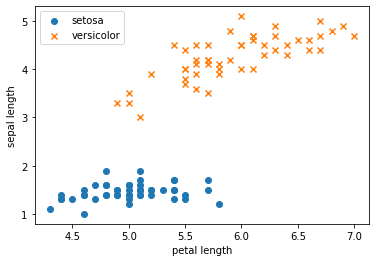

In [28]:
plt.scatter([features[:50,1]],[features[:50,2]], marker='o', label='setosa')
plt.scatter([features[50:,1]], [features[50:,2]], marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## Inicialização e parâmetros do classificador :

In [29]:
#w = np.zeros(shape=(1, features.shape[1]))

w = np.random.randn(features.shape[1]).reshape(1,3)

misclassified_ = [] 

num_iter = 10

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [[-0.97152648 -1.24277488  0.2457341 ]]


## Algoritmo classificador utilizando o Perceptron :

In [31]:
for epoch in range(num_iter):
    
    misclassified = 0
    
    for x, label in zip(features, labels):
        
        y = np.dot(w, x.transpose())
        
        #perceptron:
        
        target = 1.0 if (y > 0) else -1.0
        
        #
        
        delta = (label - target)
        
        if(delta):
            misclassified += 1
            w += label * x
            
    misclassified_.append(misclassified)

epochs = np.arange(1, num_iter+1)

print('Coeficientes w do classificador =', w)

TypeError: only size-1 arrays can be converted to Python scalars

## Erro de classificação :

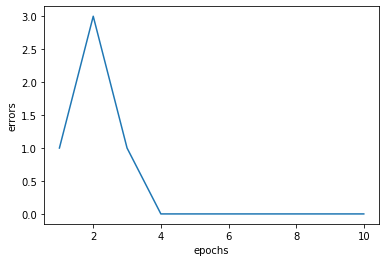

In [39]:
plt.plot(epochs, np.array(misclassified_))
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()

## Visualização do classificador :

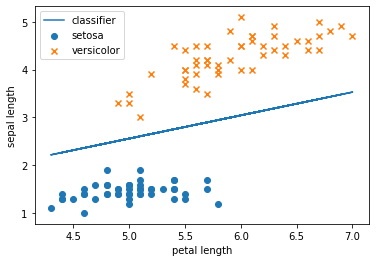

In [40]:
plt.scatter(np.array(features[:50,1]), np.array(features[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(features[50:,1]), np.array(features[50:,2]), marker='x', label='versicolor')
plt.plot((np.array(features[:,1])), -w[0][0]/w[0][2]-w[0][1]/w[0][2]*(np.array(features[:,1])), label='classifier')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [1]:
features[:,1]

NameError: name 'features' is not defined